In [1]:
import os
import argparse
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import random_split
import matplotlib.pyplot as plt

from model.CRNN import CRNN

from dataset import DatasetImg
from tools.utils import *
from tools.StrLabelConverter import *
from trainer import *



c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
random.seed(1708)
np.random.seed(1708)
torch.manual_seed(1708) # Comment lại để cho khởi tạo tham số ngẫu nhiên


In [3]:
device = ( "cuda" if torch.cuda.is_available() else "cpu")
print("---------------------------------------------------")
print(f"Using {device} device")
print("---------------------------------------------------")

with open(os.path.join('data/alphabet.txt'), 'r', encoding='utf-8') as f:
    alphabet = f.read().rstrip()
# print(alphabet)
converter = StrLabelConverter(alphabet, ignore_case=False)
converter.numClass

---------------------------------------------------
Using cpu device
---------------------------------------------------


151

In [4]:
# --------------Tạo Dataset -------------------------------------------------------
train_dataset = DatasetImg('data/train/img',  'data/train/label', imgW= 768, threshold=30)
test_dataset = DatasetImg('data/test/img',  'data/test/label', imgW= 768, threshold=30)


In [5]:
train_dataset.__len__()

4800

In [6]:
train_dataloader = torch.utils.data.DataLoader(
                    train_dataset,
                    batch_size=64,
                    shuffle=True)

In [7]:
model = CRNN(converter.numClass, 128,dropout=0.1).to(device)

criterion = torch.nn.CTCLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


>>>> use Crnn-------------



In [8]:
checkpoint = 'checkpoint/checkpoint-100.pth.tar'
if checkpoint:
    checkpoint = torch.load(checkpoint, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    log = checkpoint['log']

In [9]:
log

[{'type': 'train',
  'epoch': 1,
  'metric': {'avg_loss': 4.209802117347717,
   'avg_cer': 0.9879618814996104,
   'avg_wer': 1.0}},
 {'type': 'train',
  'epoch': 2,
  'metric': {'avg_loss': 2.7293606356779736,
   'avg_cer': 0.6701799120291803,
   'avg_wer': 0.9979701638061033}},
 {'type': 'train',
  'epoch': 3,
  'metric': {'avg_loss': 1.5560202219088872,
   'avg_cer': 0.38491723147477047,
   'avg_wer': 0.8876281972044834}},
 {'type': 'train',
  'epoch': 4,
  'metric': {'avg_loss': 0.8741264671087265,
   'avg_cer': 0.22248700118814252,
   'avg_wer': 0.6525306072943932}},
 {'type': 'train',
  'epoch': 5,
  'metric': {'avg_loss': 0.5364126546184221,
   'avg_cer': 0.13714702628889108,
   'avg_wer': 0.4562866181680536}},
 {'type': 'val',
  'epoch': 5,
  'metric': {'avg_loss': 0.596529678106308,
   'avg_cer': 0.1524206549246349,
   'avg_wer': 0.4712967599559081}},
 {'type': 'train',
  'epoch': 6,
  'metric': {'avg_loss': 0.3471198167403539,
   'avg_cer': 0.08651402020569524,
   'avg_wer': 0

# Visualize

In [13]:
train_metric = {
    'epoch': [],
    'avg_loss':[],
    'avg_cer' : [],
    'avg_wer' : []
}

test_metric = {
    'epoch': [],
    'avg_loss':[],
    'avg_cer' : [],
    'avg_wer' : []
}

for i, item in enumerate(log):
    if( item['type'] == 'train'):
        train_metric['epoch'].append(item['epoch'])
        train_metric['avg_loss'].append(item['metric']['avg_loss'])
        train_metric['avg_cer'].append(item['metric']['avg_cer'])
        train_metric['avg_wer'].append(item['metric']['avg_wer'])
    else:
        test_metric['epoch'].append(item['epoch'])
        test_metric['avg_loss'].append(item['metric']['avg_loss'])
        test_metric['avg_cer'].append(item['metric']['avg_cer'])
        test_metric['avg_wer'].append(item['metric']['avg_wer'])



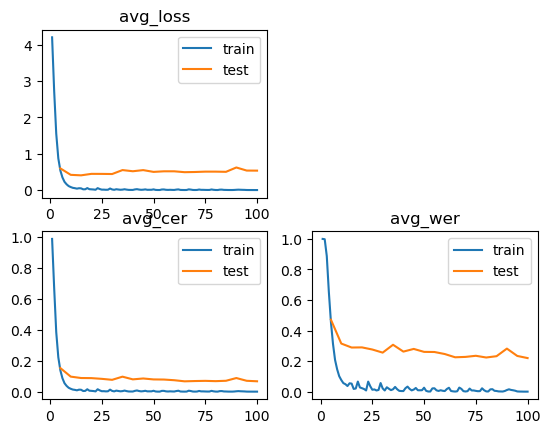

In [19]:
plt.subplot(2, 2, 1)
plt.plot(train_metric['epoch'], train_metric['avg_loss'], label = 'train')
plt.plot(test_metric['epoch'], test_metric['avg_loss'], label = 'test')
plt.legend()
plt.title('avg_loss')

plt.subplot(2, 2, 3)
plt.plot(train_metric['epoch'], train_metric['avg_cer'], label = 'train')
plt.plot(test_metric['epoch'], test_metric['avg_cer'], label = 'test')
plt.legend()
plt.title('avg_cer')

plt.subplot(2, 2, 4)
plt.plot(train_metric['epoch'], train_metric['avg_wer'], label = 'train')
plt.plot(test_metric['epoch'], test_metric['avg_wer'], label = 'test')
plt.legend()
plt.title('avg_wer')
plt.show()

# Dự đoán 1 ảnh

In [10]:
from tester import Tester

tester = Tester(model, criterion, converter)

Hôn nay tô biên lấn.


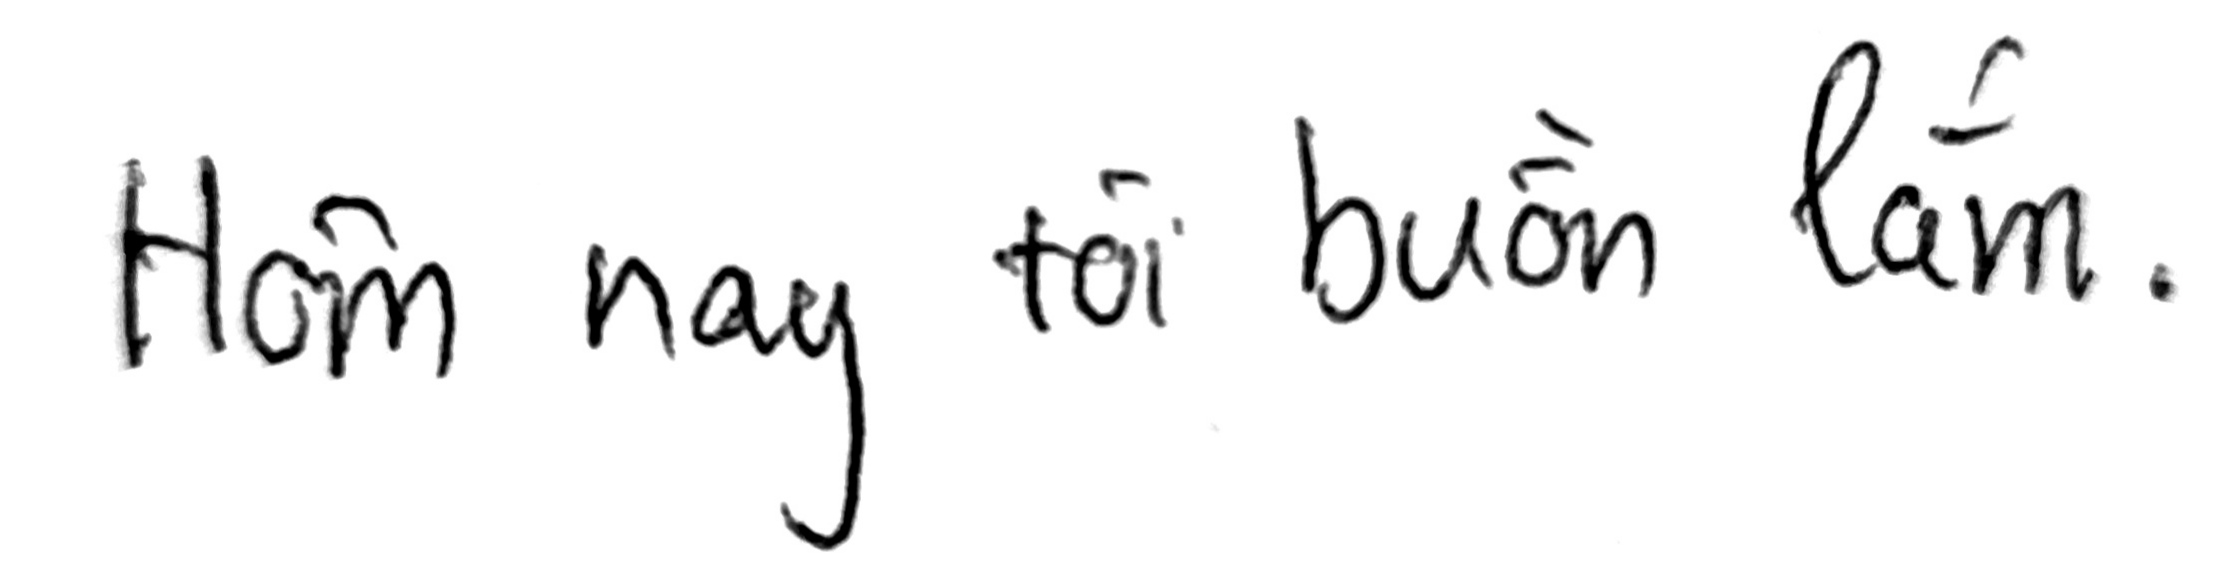

In [11]:
path = 'D:/test.jpg'
print(tester.predict(path))
Image.open(path)


# Dự đoán nhiều ảnh

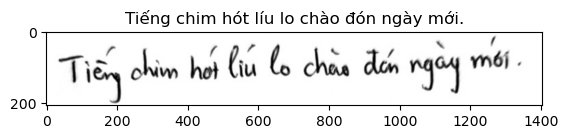

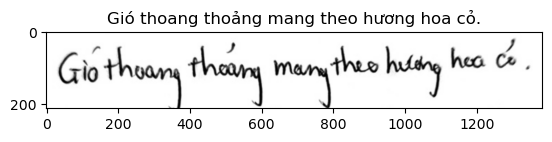

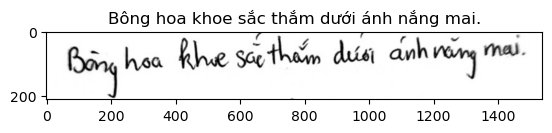

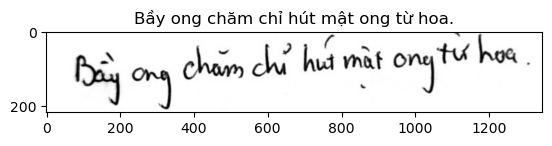

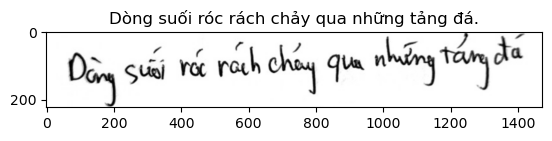

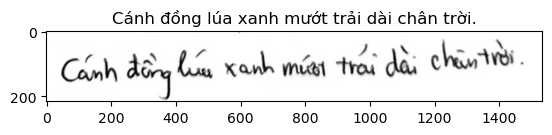

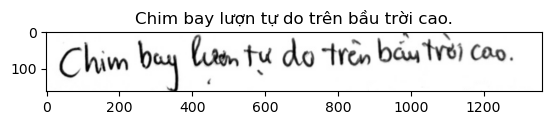

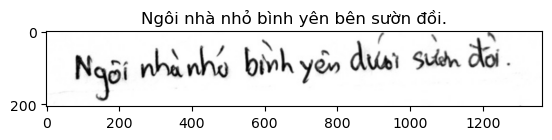

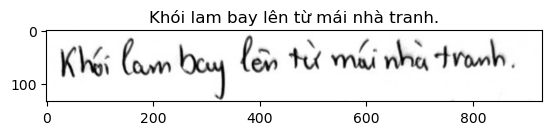

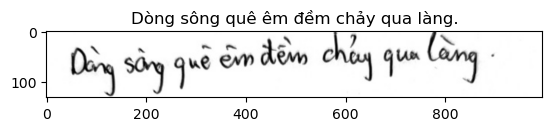

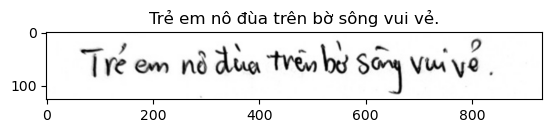

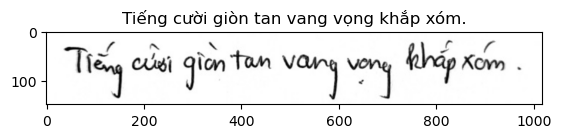

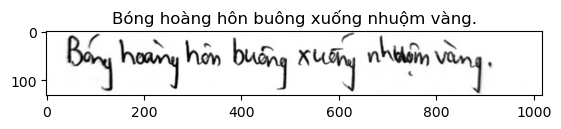

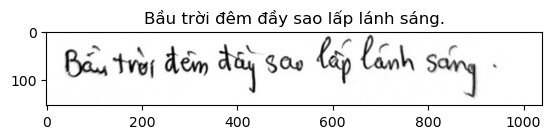

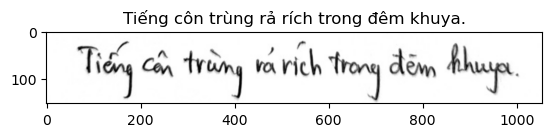

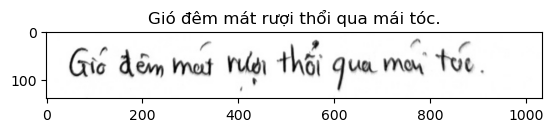

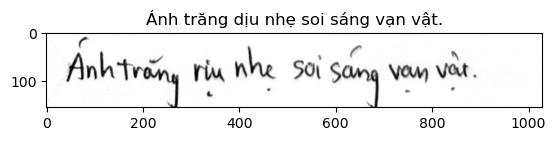

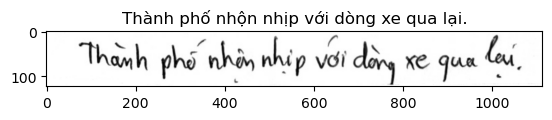

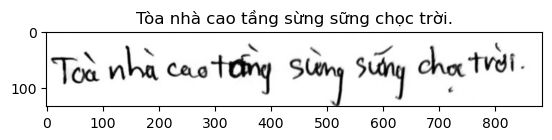

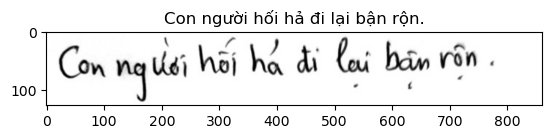

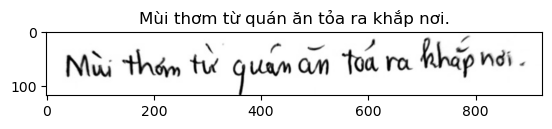

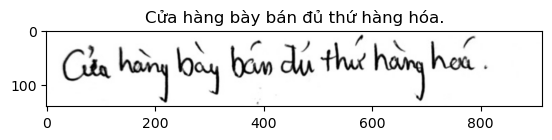

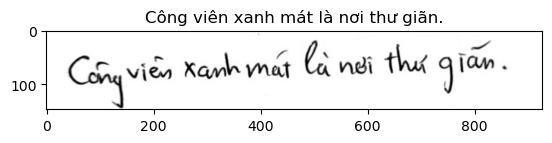

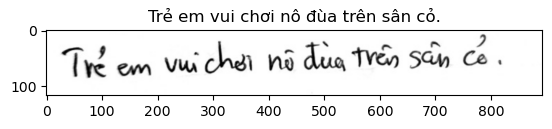

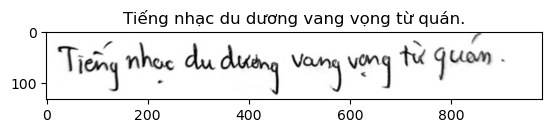

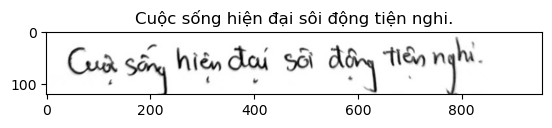

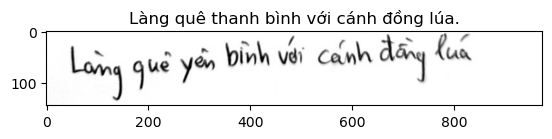

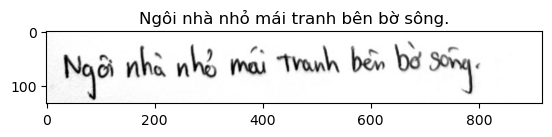

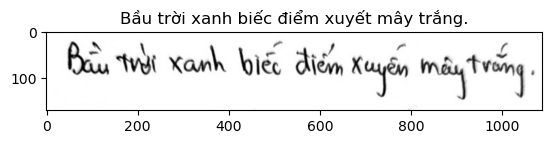

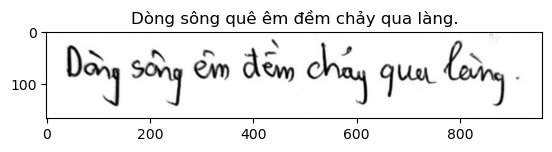

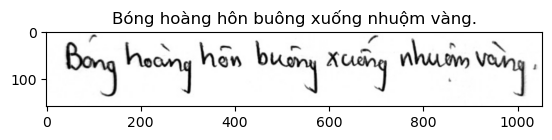

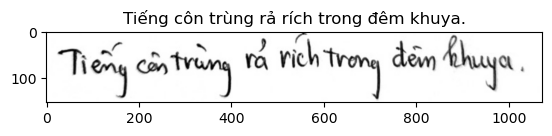

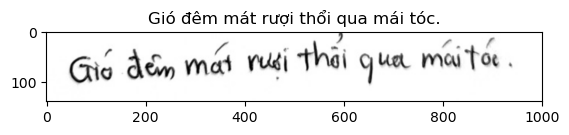

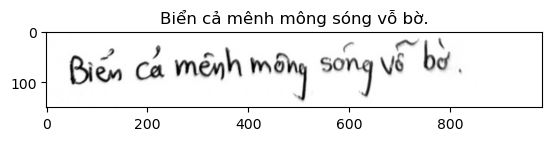

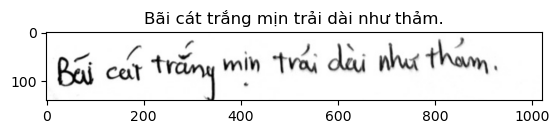

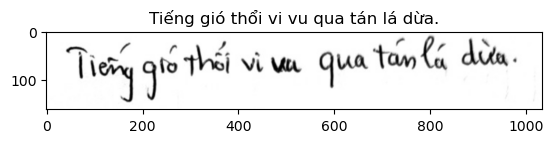

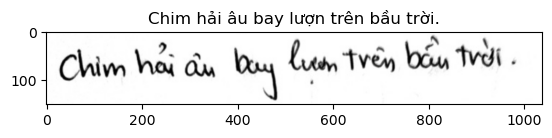

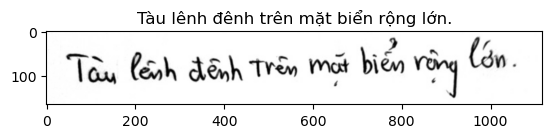

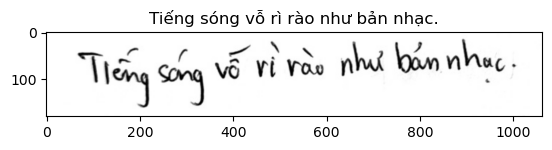

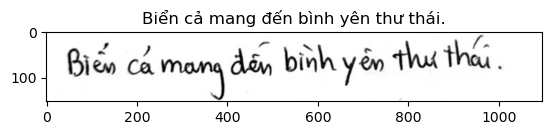

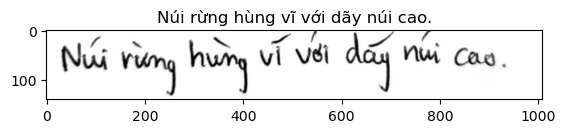

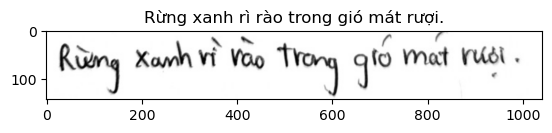

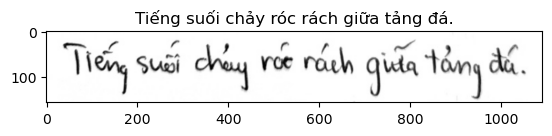

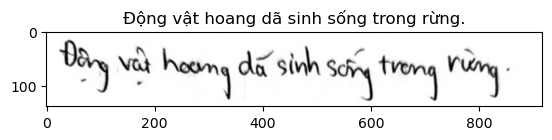

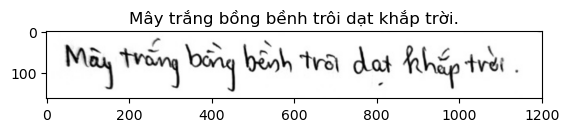

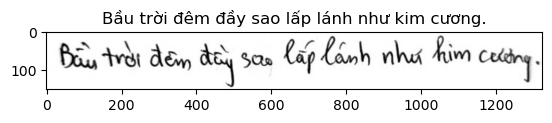

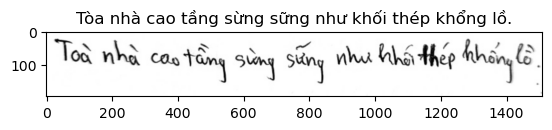

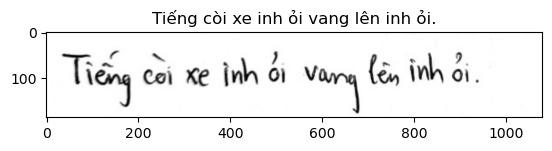

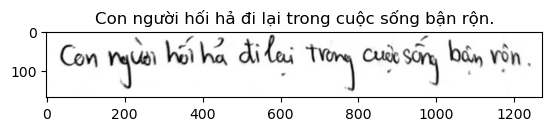

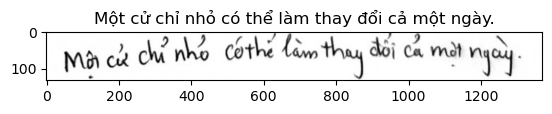

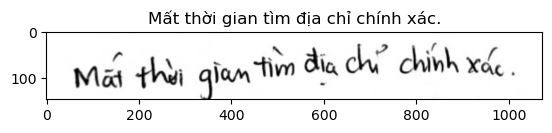

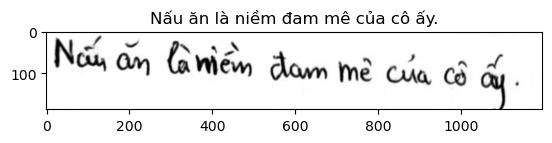

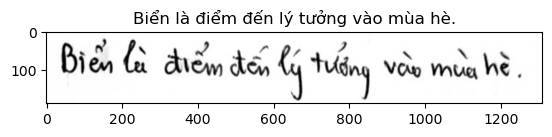

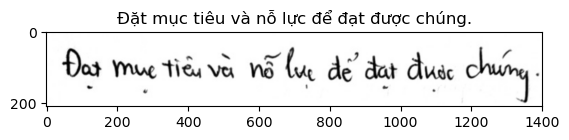

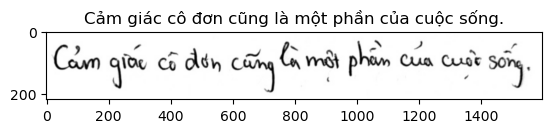

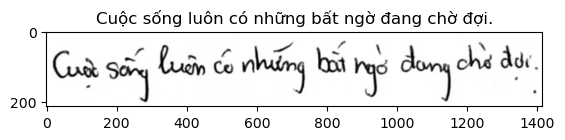

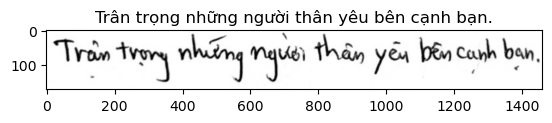

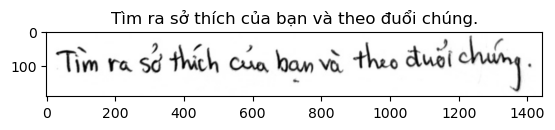

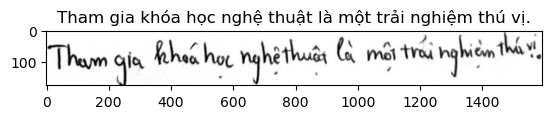

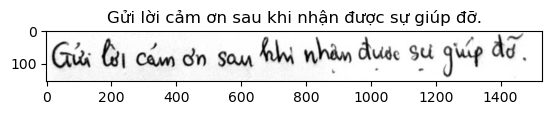

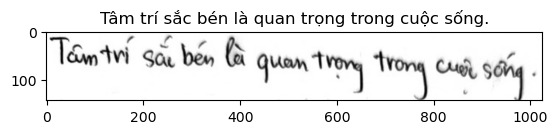

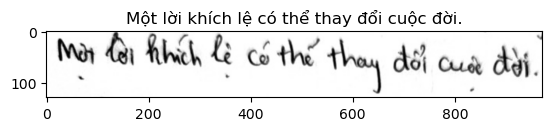

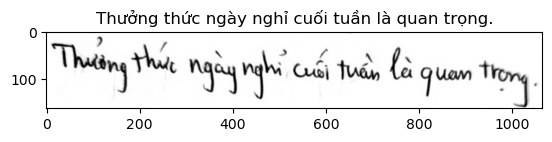

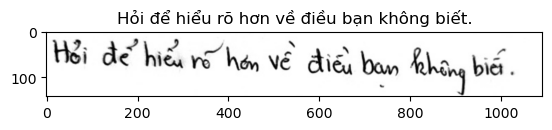

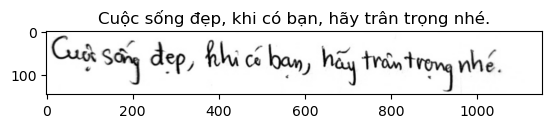

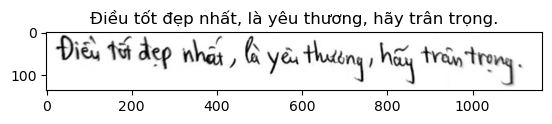

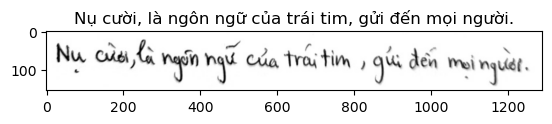

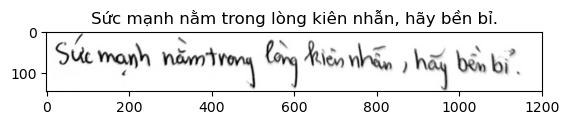

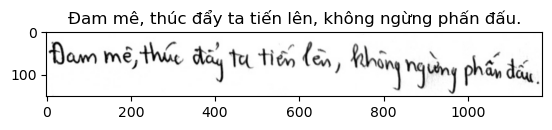

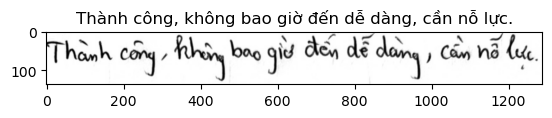

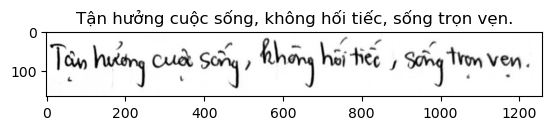

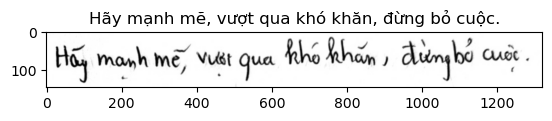

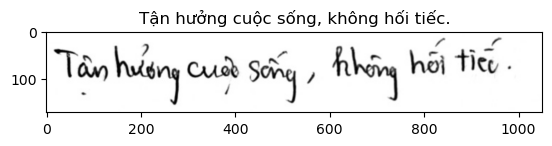

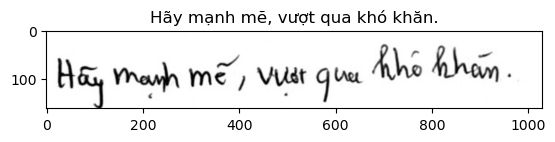

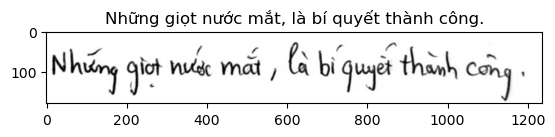

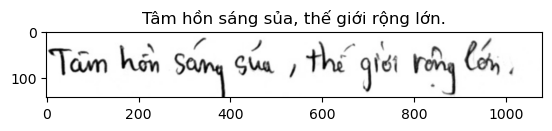

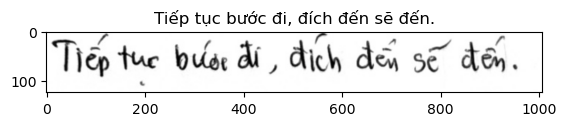

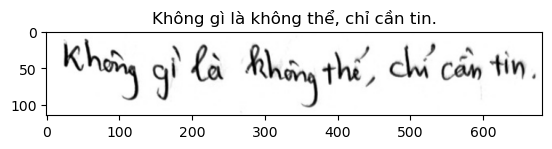

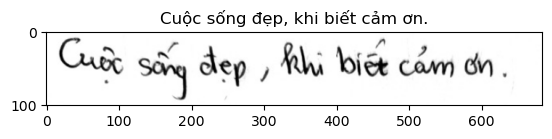

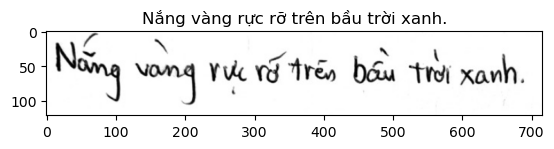

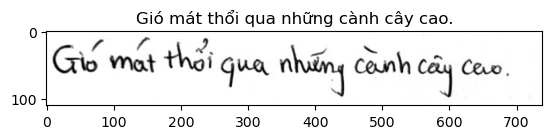

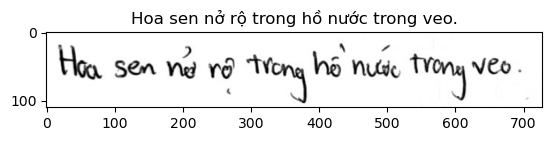

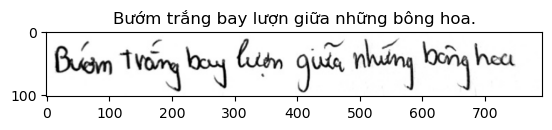

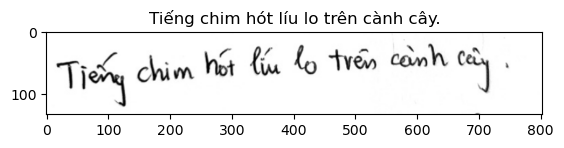

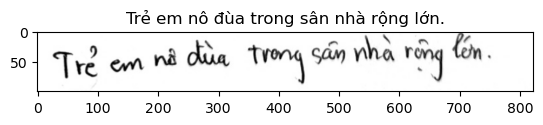

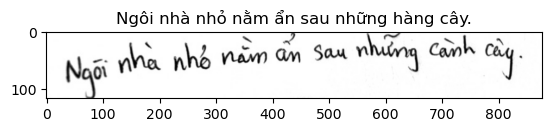

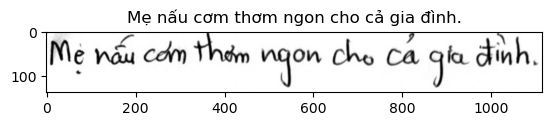

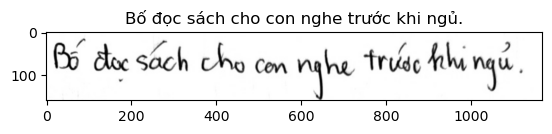

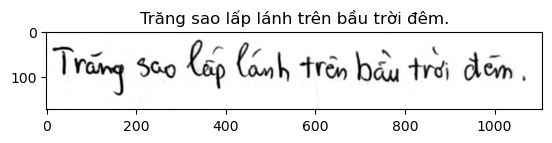

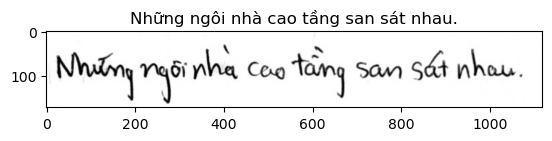

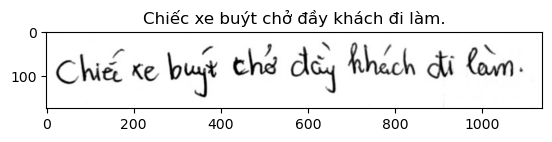

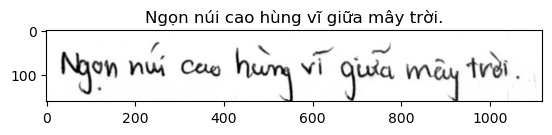

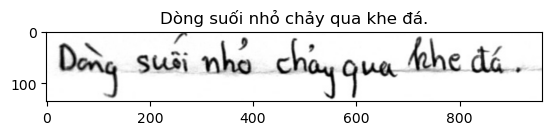

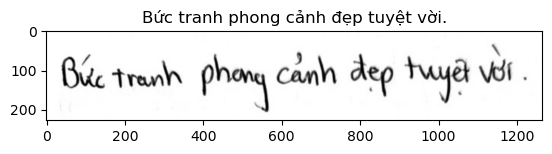

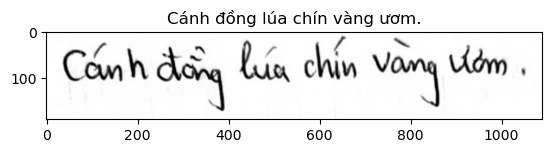

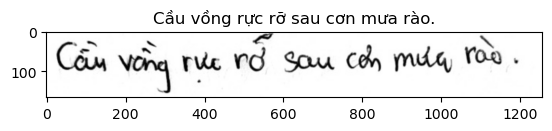

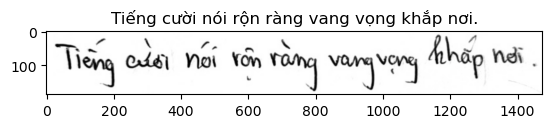

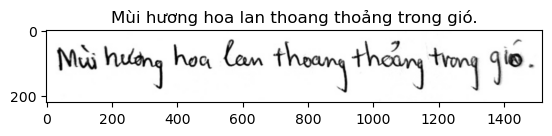

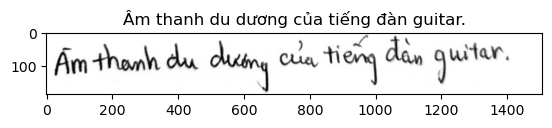

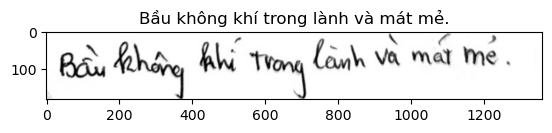

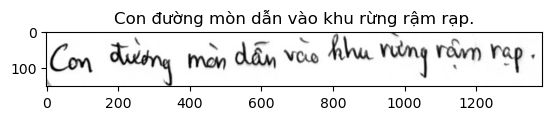

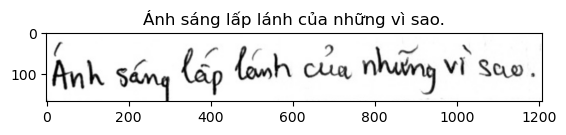

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

root = 'data/train/img'
for path in os.listdir(root):
    if 'tandat' in path:
        imgpath = root + '/' + path
        img = Image.open(imgpath)
        plt.imshow(img)
        plt.title(tester.predict(imgpath))
        plt.show()
        
        